Este projeto tem por objetivo tentar provar a hipotese: "Países membros da OTAN possuem maior comercio de material bélico em relação a países externos ao bloco"

==========GUIA===========

Para o meu projeo 1 de Ciência dos dados, a organização escolhida foi a OTAN. A hipotese gerada foi: “Países membros da OTAN ou que adentraram o bloco posteriormente possuem maior exportação e importação de produtos bélicos”.
Para tentar comprovar essa hipotese a seguinte abordagem será seguida:

1.	Selecionar países que estão no bloco desde sua findação ou que entraram ja há um tempo razoavel no bloco, para que seus dados sejam confiaveis.

2.	Selecionar Países que entraram posteriormente no bloco, de forma que se possa ver com base nos dados obtidos no gapminder se há ou não mudanças em seus dados a partir de seu ano de entrada.

3.	Comparar os dados de importação e exportação de produtos belicos dos paises de dentro e de fora do bloco, e ressaltar as diferenças nos dados dos paises que entrarm postteriormente, de forma a mostrar possiveis aumentos ou decressimos em sesus indices a partir do ano de entrada na OTAN.

4.	Para comparar os paises serão geras tabelas comparativas, com dados lado a lado de acordo com os anos, a fim de encontrar diferenças e acabar por provar a hipotese.

5.	Fazer co-relações com entre o tempo do país no bloco e o aumento em suas comercializações bélicas.


In [140]:

%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Comecei importando os arquivos xlsx, no caso eu criei primeiramente um xlsx maior, com todos os dados, e o chamei de dados, porém por quesões de organização decidi dividi-lo em arquivos menores, nas categorias selecionadas e descritas pelo seu nome, da seguinte forma:

In [141]:
#importando os databases
dados_importacao=pd.read_excel("arms_imports_us_inflation_adjusted.xlsx")
#dados_importacao=dados_importacao.set_index("country")
dados_importacao.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,40000000.0,56000000.0,64000000.0,40000000.0,56000000.0,91000000.0,198000000.0,230000000.0,145000000.0,...,1.500000e+08,3.440000e+08,377000000.0,6.600000e+08,521000000.0,235000000.0,288000000.0,116000000.0,1.760000e+08,250000000.0
1,Albania,62000000.0,74000000.0,46000000.0,11000000.0,7000000.0,177000000.0,74000000.0,161000000.0,265000000.0,...,NaN,NaN,NaN,NaN,15000000.0,7000000.0,7000000.0,7000000.0,NaN,NaN
2,Algeria,NaN,7000000.0,61000000.0,85000000.0,154000000.0,323000000.0,452000000.0,524000000.0,57000000.0,...,1.530000e+09,1.080000e+09,834000000.0,1.130000e+09,807000000.0,302000000.0,438000000.0,883000000.0,2.890000e+09,905000000.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.900000e+07,2.000000e+07,NaN,NaN,NaN,31000000.0,2000000.0,47000000.0,1.240000e+08,204000000.0
4,Argentina,111000000.0,205000000.0,48000000.0,19000000.0,19000000.0,7000000.0,93000000.0,146000000.0,430000000.0,...,2.300000e+07,1.100000e+07,11000000.0,1.500000e+07,3000000.0,12000000.0,7000000.0,21000000.0,1.700000e+07,49000000.0


In [142]:
dados_exportacao=pd.read_excel("arms_exports_us_inflation_adjusted.xlsx")
#dados_exportacao=dados_exportacao.set_index("country")
dados_exportacao.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,NaN,6000000.0,NaN,4000000.0,NaN,NaN,NaN,8000000.0,...,NaN,NaN,NaN,1000000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,NaN,2000000.0,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,25000000.0,80000000.0,115000000.0,143000000.0,45000000.0,54000000.0,97000000.0,87000000.0,134000000.0,97000000.0


In [143]:
#lista de paises dentro for e com entrada posterios na OTAN
paises_OTAN=["United States","France","Italy"]
paises_fora=["Brazil","China","Switzerland"]
paises_entrar=["Spain","Greece","Turkey"]
#todos=["United States","France","Italy","Brazil","China","Switzerland","Spain","Greece","Turkey"]


In [144]:
#dando join
di=dados_importacao
de=dados_exportacao
dados=de.join(di,lsuffix='_export', rsuffix='_import')
dados=dados.set_index('country_export')
#dados.head()


#criando uma coluna quali no database
dados["grupo"]="?"
dados.loc[paises_OTAN,"grupo"]="dentro"
dados.loc[paises_entrar,"grupo"]="entrada posterior"
dados.loc[paises_fora,"grupo"]="fora"
#dados=dados.transpose()
dados.head()




,1960_export,1961_export,1962_export,1963_export,1964_export,1965_export,1966_export,1967_export,1968_export,1969_export,...,2009_import,2010_import,2011_import,2012_import,2013_import,2014_import,2015_import,2016_import,2017_import,grupo
country_export,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.440000e+08,377000000.0,6.600000e+08,521000000.0,235000000.0,288000000.0,116000000.0,1.760000e+08,250000000.0,?
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,...,NaN,NaN,NaN,15000000.0,7000000.0,7000000.0,7000000.0,NaN,NaN,?
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.080000e+09,834000000.0,1.130000e+09,807000000.0,302000000.0,438000000.0,883000000.0,2.890000e+09,905000000.0,?
Argentina,NaN,NaN,6000000.0,NaN,4000000.0,NaN,NaN,NaN,8000000.0,NaN,...,2.000000e+07,NaN,NaN,NaN,31000000.0,2000000.0,47000000.0,1.240000e+08,204000000.0,?
Australia,NaN,2000000.0,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,26000000.0,...,1.100000e+07,11000000.0,1.500000e+07,3000000.0,12000000.0,7000000.0,21000000.0,1.700000e+07,49000000.0,?


agora que ja foi montada a tabela geral, com os dados de importação e exportação, e uma coluna qualitativa foi criada, separaremos as linhas escolhidas de acordo com a coluna qualitativa("grupo") criada

In [145]:
#separando os dados dos países pertencentes a OTAN
inside=dados.loc[(dados["grupo"]=="dentro")]
inside.head()

	

,1960_export,1961_export,1962_export,1963_export,1964_export,1965_export,1966_export,1967_export,1968_export,1969_export,...,2009_import,2010_import,2011_import,2012_import,2013_import,2014_import,2015_import,2016_import,2017_import,grupo
country_export,,,,,,,,,,,,,,,,,,,,,
France,9.090000e+08,9.400000e+08,9.740000e+08,1.230000e+09,1.420000e+09,1.200000e+09,1.650000e+09,1.530000e+09,1.480000e+09,1.460000e+09,...,76000000.0,1.030000e+08,33000000.0,9.100000e+07,107000000.0,17000000.0,42000000.0,45000000.0,65000000.0,dentro
Italy,1.040000e+08,2.440000e+08,2.610000e+08,2.400000e+08,3.850000e+08,2.950000e+08,2.430000e+08,1.490000e+08,1.920000e+08,3.250000e+08,...,113000000.0,1.150000e+08,298000000.0,2.190000e+08,92000000.0,144000000.0,252000000.0,762000000.0,794000000.0,dentro
United States,6.060000e+09,6.340000e+09,5.960000e+09,8.940000e+09,1.220000e+10,1.120000e+10,8.400000e+09,7.260000e+09,8.450000e+09,1.180000e+10,...,968000000.0,1.100000e+09,995000000.0,1.200000e+09,787000000.0,572000000.0,528000000.0,496000000.0,547000000.0,dentro


In [146]:
outside=dados.loc[(dados["grupo"]=="fora")]
outside.head()

,1960_export,1961_export,1962_export,1963_export,1964_export,1965_export,1966_export,1967_export,1968_export,1969_export,...,2009_import,2010_import,2011_import,2012_import,2013_import,2014_import,2015_import,2016_import,2017_import,grupo
country_export,,,,,,,,,,,,,,,,,,,,,
Brazil,2000000.0,12000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000000.0,...,1.560000e+08,3.170000e+08,3.120000e+08,3.110000e+08,2.230000e+08,2.180000e+08,2.220000e+08,116000000.0,1.030000e+08,fora
China,285000000.0,35000000.0,51000000.0,11000000.0,61000000.0,419000000.0,619000000.0,410000000.0,730000000.0,657000000.0,...,1.390000e+09,1.050000e+09,1.110000e+09,1.690000e+09,1.390000e+09,1.150000e+09,1.140000e+09,991000000.0,1.120000e+09,fora
Switzerland,442000000.0,500000000.0,530000000.0,337000000.0,379000000.0,484000000.0,367000000.0,261000000.0,91000000.0,104000000.0,...,3.900000e+07,4.800000e+07,3.200000e+07,1.100000e+07,6.000000e+06,1.000000e+06,2.000000e+06,64000000.0,3.400000e+07,fora


In [147]:
lately=dados.loc[(dados["grupo"]=="entrada posterior")]
lately.head()

,1960_export,1961_export,1962_export,1963_export,1964_export,1965_export,1966_export,1967_export,1968_export,1969_export,...,2009_import,2010_import,2011_import,2012_import,2013_import,2014_import,2015_import,2016_import,2017_import,grupo
country_export,,,,,,,,,,,,,,,,,,,,,
Greece,NaN,NaN,NaN,NaN,7000000.0,1000000.0,NaN,NaN,NaN,NaN,...,1.240000e+09,641000000.0,81000000.0,2.900000e+07,47000000.0,2.040000e+08,771000000.0,324000000.0,56000000.0,entrada posterior
Spain,1000000.0,5000000.0,6000000.0,6000000.0,7000000.0,21000000.0,21000000.0,7000000.0,7000000.0,6000000.0,...,2.330000e+08,288000000.0,187000000.0,2.440000e+08,175000000.0,1.280000e+08,143000000.0,86000000.0,72000000.0,entrada posterior
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.320000e+08,484000000.0,777000000.0,1.500000e+09,797000000.0,1.530000e+09,460000000.0,348000000.0,410000000.0,entrada posterior


Agora que ja temos todos os dados divididos, vou dividi-los de acordo com sua informação (importação ou exportação), e em seguida irei plotar os graficos de importação e exportação dos paises dentro e fora da OTAN

Países Dentro da OTAN

Text(0, 0.5, 'Importações de materiais bélicos')

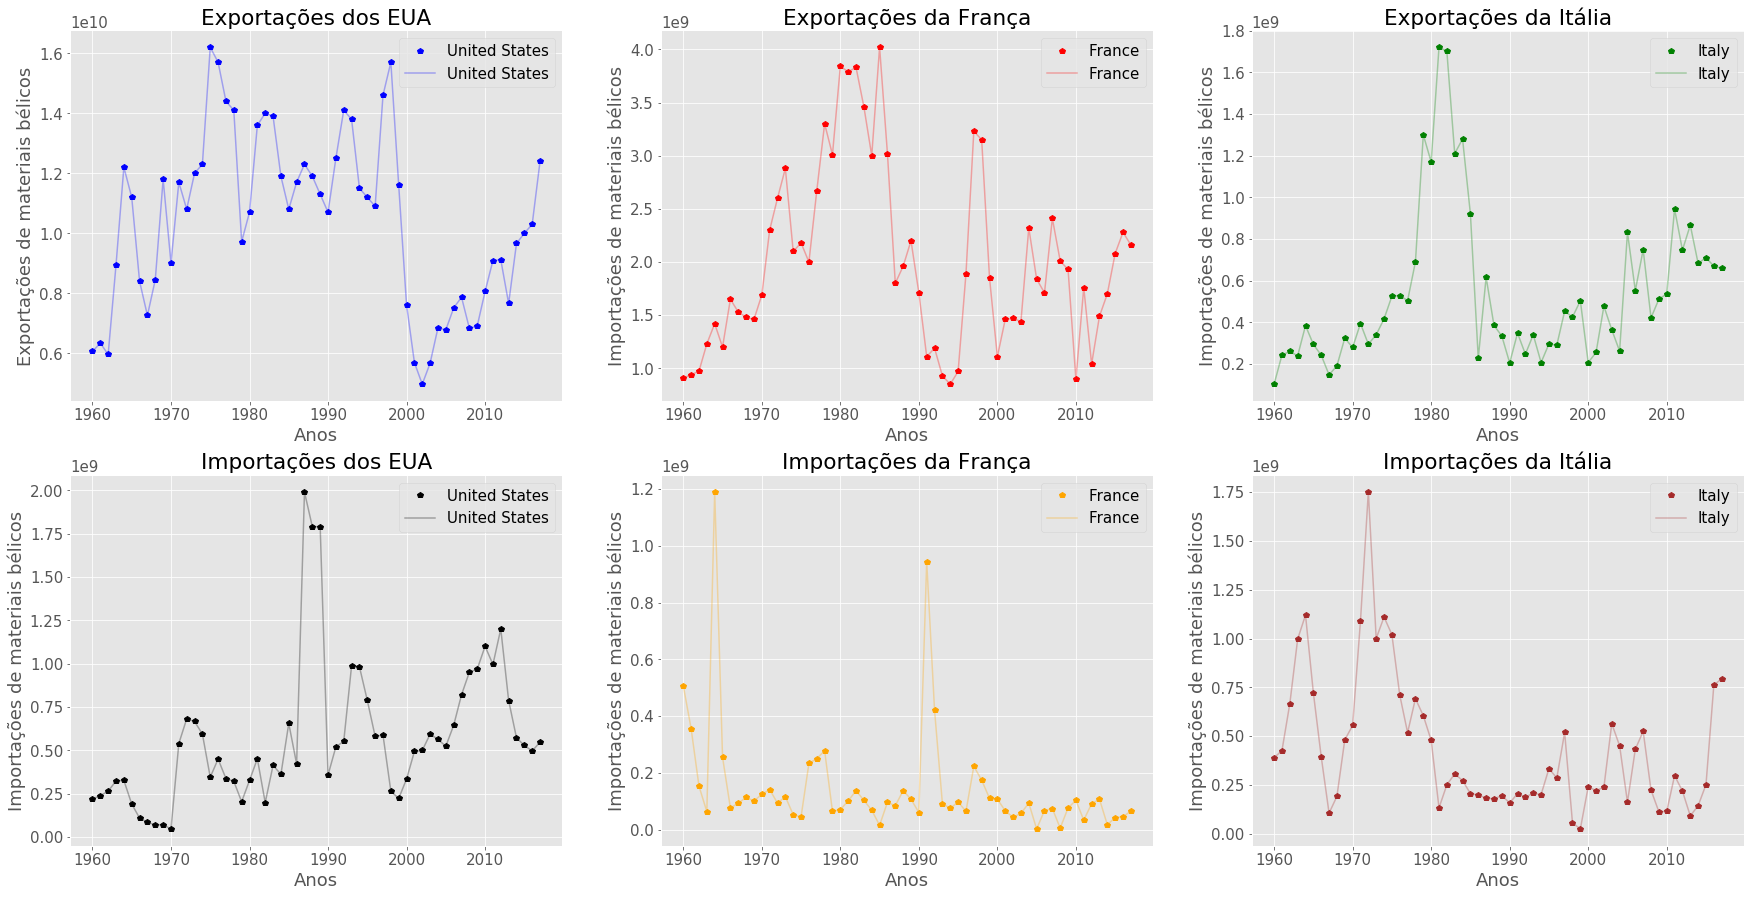

In [148]:
#definido a nossa lista tempo
t=range(1960,2018)
#inside_eua=inside.loc[inside["country_import"]=="United States"]

#separando o dados de cada país

#importações
inside_eua_export=inside.iloc[2,0:58]

inside_france_export=inside.iloc[0,0:58]

inside_italy_export=inside.iloc[1,0:58]
#
#exportações
inside_eua_import=inside.iloc[2,59:117]

inside_italy_import=inside.iloc[1,59:117]

inside_france_import=inside.iloc[0,59:117]


#plotando os graficos
plt.rc("font",size=15)
fig=plt.figure(figsize=(30, 15))

#a=t.cov(inside_eua_export)/t.var()
#b=inside_eua_export.mean()-a*t.mean()
#plotando gráficos das Exportações
plt.subplot(231)
plot=plt.plot(t,inside_eua_export,'pb')
plot=plt.plot(t,inside_eua_export,'b',alpha=0.3)
plt.title('Exportações dos EUA')
plt.xlabel("Anos")
plt.ylabel("Exportações de materiais bélicos")
plt.legend()
plt.grid(True)

plt.subplot(232)
plot=plt.plot(t,inside_france_export,'pr')
plot=plt.plot(t,inside_france_export,'r', alpha=0.3)
plt.title("Exportações da França")
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)

plt.subplot(233)
plot=plot=plt.plot(t,inside_italy_export,'pg')
plot=plt.plot(t,inside_italy_export,'g', alpha=0.3)
plt.title("Exportações da Itália")
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)

#plotando gráficos das Importações
plt.subplot(234)
plot=plt.plot(t,inside_eua_import,'p',color="black")
plot=plt.plot(t,inside_eua_import,color="black",alpha=0.3)
plt.title('Importações dos EUA')
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)

plt.subplot(235)
plot=plt.plot(t,inside_france_import,'p',color="orange")
plot=plt.plot(t,inside_france_import,color="orange", alpha=0.3)
plt.title("Importações da França")
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)


plt.subplot(236)
plot=plot=plt.plot(t,inside_italy_import,'p',color="brown")
plot=plt.plot(t,inside_italy_import,color="brown", alpha=0.3)
plt.legend()
plt.title("Importações da Itália")
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")


Nesses gráficos podemos ver como variaram as taxas de Exppotação e Importação de material bélico dos países integrantes da OTAN ao longo dos anos

Agora plotarei os gráficos desses 3 paises juntos, para os dados de Exportação e Importação

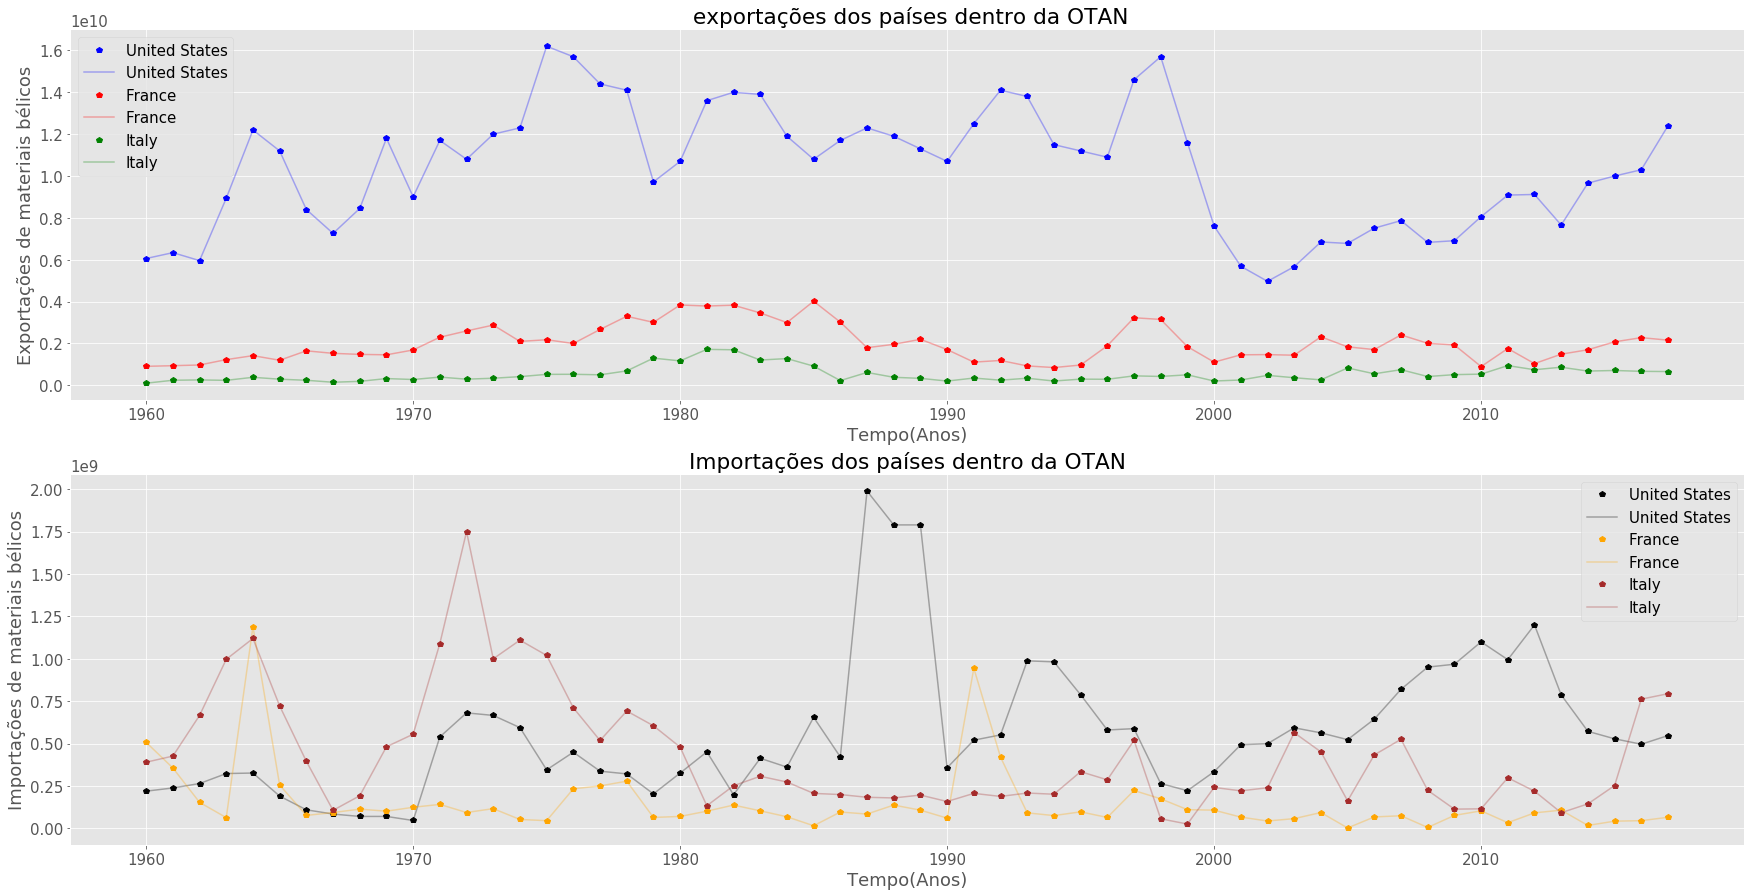

In [149]:
plt.rc("font",size=15)
fig=plt.figure(figsize=(30, 15))

plt.subplot(211)
plot=plt.plot(t,inside_eua_export,'pb')
plot=plt.plot(t,inside_eua_export,'b',alpha=0.3)

plot=plt.plot(t,inside_france_export,'pr')
plot=plt.plot(t,inside_france_export,'r', alpha=0.3)

plot=plt.plot(t,inside_italy_export,'pg')
plot=plt.plot(t,inside_italy_export,'g', alpha=0.3)

plt.title(" exportações dos países dentro da OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Exportações de materiais bélicos")
plt.legend()
plt.grid(True)




plt.subplot(212)
plot=plt.plot(t,inside_eua_import,'p',color="black")
plot=plt.plot(t,inside_eua_import,color="black",alpha=0.3)

plot=plt.plot(t,inside_france_import,'p',color="orange")
plot=plt.plot(t,inside_france_import,color="orange", alpha=0.3)

plot=plt.plot(t,inside_italy_import,'p',color="brown")
plot=plt.plot(t,inside_italy_import,color="brown", alpha=0.3)

plt.title("Importações dos países dentro da OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)


Nesse gráfico podemos comparar as importações e Exportações de materiais bélicos dos países pertencentes à OTAN ao longo dos anos

Países fora da OTAN

OBS: em alguns gráficos pode haver a ausendcia de algumas linhas, isso se deve ao database
pois há a ausencia de alguns dados, assim inviabilizando o progama de criar o grafico corretamente
em todos os pontos


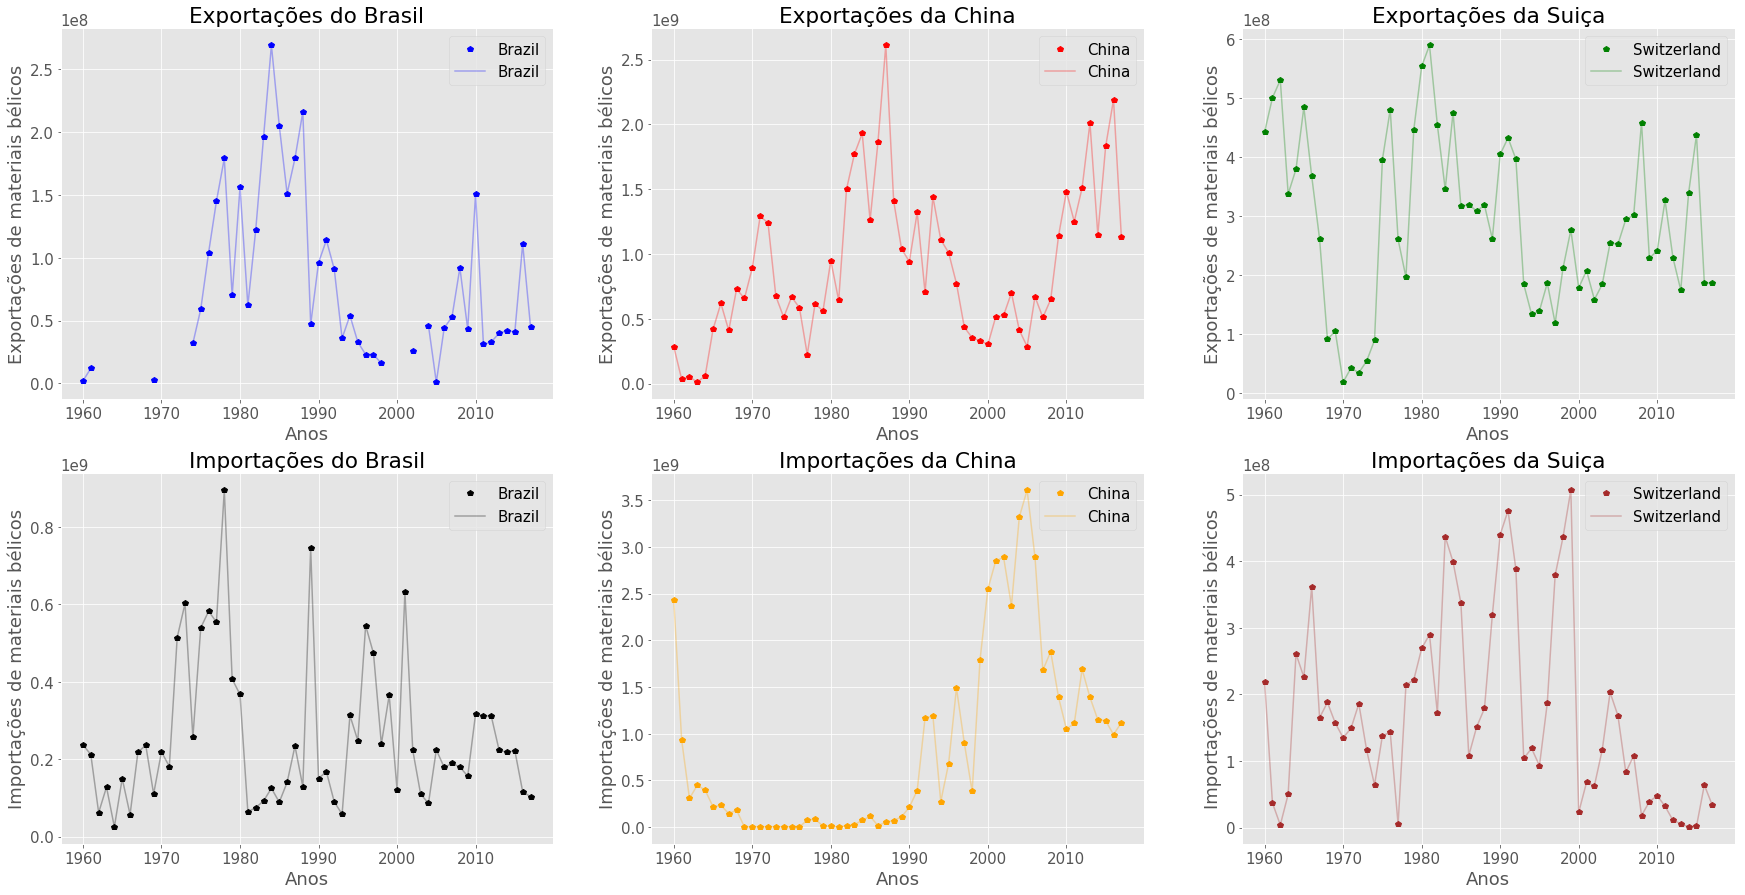

In [150]:
#separando dados de cada país
#importações 
outside_brazil_export=outside.iloc[0,0:58]

outside_china_export=outside.iloc[1,0:58]

outside_switzerland_export=outside.iloc[2,0:58]

#exportações
outside_brazil_import=outside.iloc[0,59:117]

outside_china_import=outside.iloc[1,59:117]

outside_switzerland_import=outside.iloc[2,59:117]



#plotando os gráficos
plt.rc("font",size=15)
fig=plt.figure(figsize=(30,15))

#plotando gráficos das Exportações
plt.subplot(231)
plot=plt.plot(t,outside_brazil_export,'pb')
plot=plt.plot(t,outside_brazil_export,'b',alpha=0.3)
plt.title('Exportações do Brasil')
plt.xlabel("Anos")
plt.ylabel("Exportações de materiais bélicos")
plt.legend()
plt.grid(True)

plt.subplot(232)
plot=plt.plot(t,outside_china_export,'pr')
plot=plt.plot(t,outside_china_export,'r', alpha=0.3)
plt.title("Exportações da China")
plt.xlabel("Anos")
plt.ylabel("Exportações de materiais bélicos")
plt.legend()
plt.grid(True)


plt.subplot(233)
plot=plt.plot(t,outside_switzerland_export,'pg')
plot=plt.plot(t,outside_switzerland_export,'g', alpha=0.3)
plt.title("Exportações da Suiça")
plt.xlabel("Anos")
plt.ylabel("Exportações de materiais bélicos")
plt.legend()
plt.grid(True)


#plotando os gráficos das Importações
plt.subplot(234)
plot=plt.plot(t,outside_brazil_import,'p',color="black")
plot=plt.plot(t,outside_brazil_import,color="black",alpha=0.3)
plt.title('Importações do Brasil')
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)

plt.subplot(235)
plot=plt.plot(t,outside_china_import,'p',color="orange")
plot=plt.plot(t,outside_china_import,color="orange", alpha=0.3)
plt.title("Importações da China")
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)


plt.subplot(236)
plot=plt.plot(t,outside_switzerland_import,'p',color="brown")
plot=plt.plot(t,outside_switzerland_import,color="brown", alpha=0.3)
plt.legend()
plt.title("Importações da Suiça")
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")

print("OBS: em alguns gráficos pode haver a ausendcia de algumas linhas, isso se deve ao database")
print("pois há a ausencia de alguns dados, assim inviabilizando o progama de criar o grafico corretamente")
print("em todos os pontos")

Nesses gráficos podemos análisar as taxas de exportações e importações de materiais bélicos dos países que não fazem parte da OTAN ao longo dos anos

Agora plotarei o gráfico conjunto de Importações e Exportações dos Países fora da OTAN 

Text(0, 0.5, 'Importações de materiais bélicos')

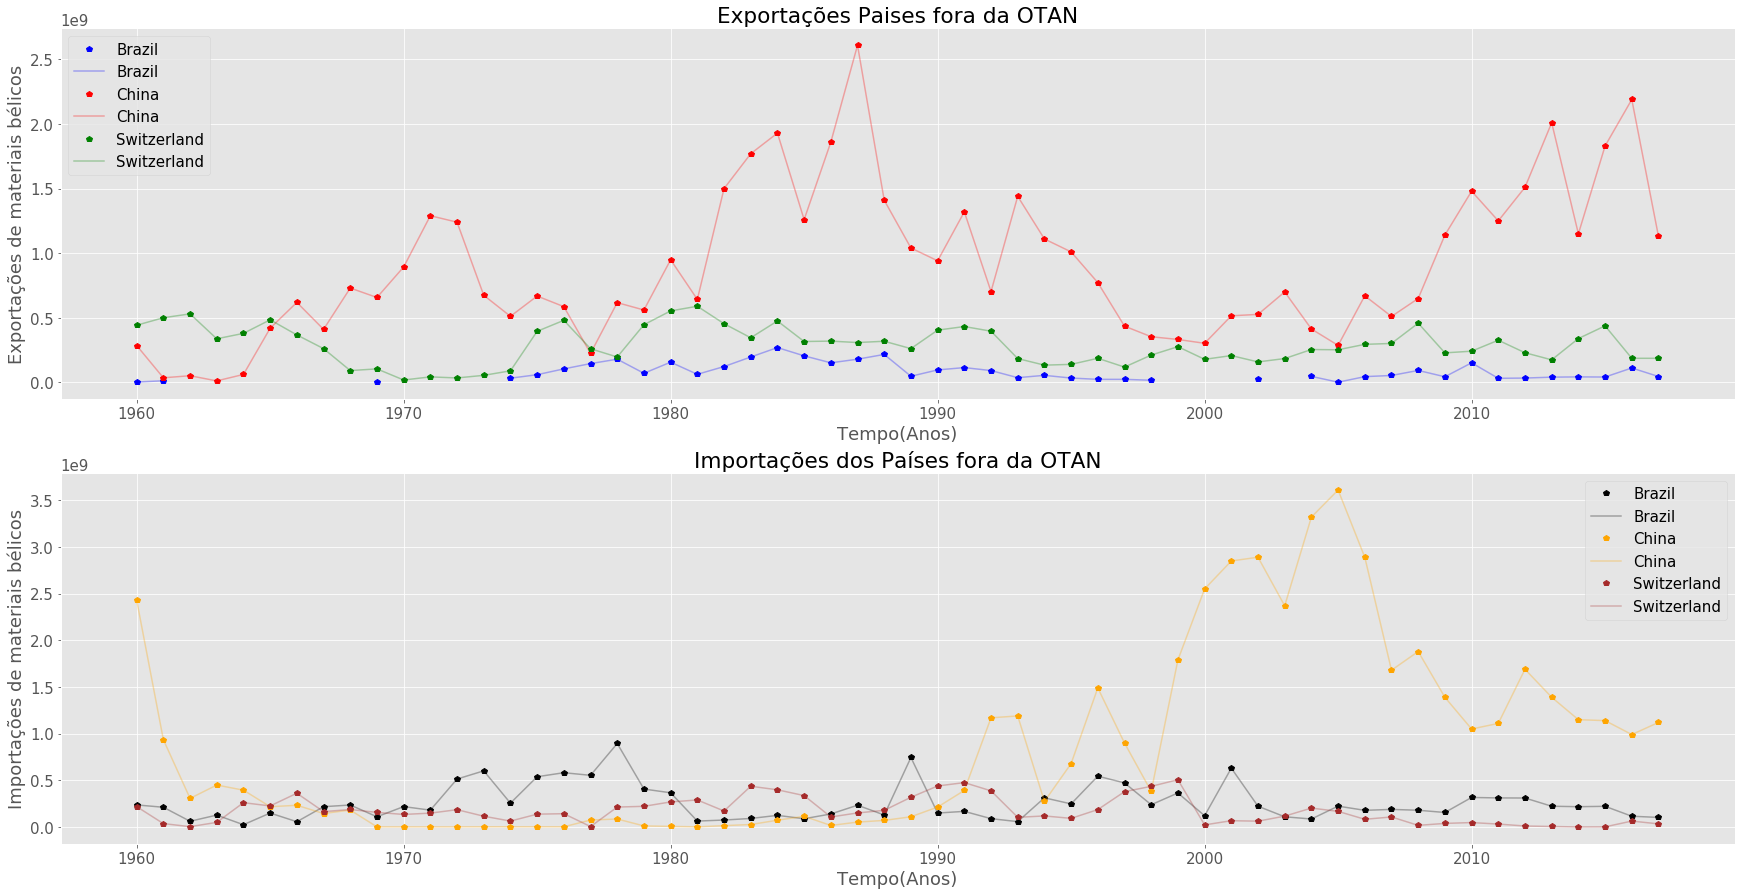

In [151]:
plt.rc("font",size=15)
fig=plt.figure(figsize=(30,15))

plt.subplot(211)
plot=plt.plot(t,outside_brazil_export,'pb')
plot=plt.plot(t,outside_brazil_export,'b',alpha=0.3)

plot=plt.plot(t,outside_china_export,'pr')
plot=plt.plot(t,outside_china_export,'r', alpha=0.3)

plot=plt.plot(t,outside_switzerland_export,'pg')
plot=plt.plot(t,outside_switzerland_export,'g', alpha=0.3)
plt.legend()
plt.grid(True)
plt.title("Exportações Paises fora da OTAN")
plt.ylabel("Exportações de materiais bélicos")
plt.xlabel('Tempo(Anos)')

plt.subplot(212)
plot=plt.plot(t,outside_brazil_import,'p',color="black")
plot=plt.plot(t,outside_brazil_import,color="black",alpha=0.3)

plot=plt.plot(t,outside_china_import,'p',color="orange")
plot=plt.plot(t,outside_china_import,color="orange", alpha=0.3)

plot=plt.plot(t,outside_switzerland_import,'p',color="brown")
plot=plt.plot(t,outside_switzerland_import,color="brown", alpha=0.3)
plt.legend()
plt.grid(True)
plt.title("Importações dos Países fora da OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Importações de materiais bélicos")



Nesse gráfico podemos analisar como variou as taxas de Importações e Exportações de materiais bélicos dos países fora da OTAN ao longo dos anos

Paises que entraram posteriormente na OTAN

Text(0, 0.5, 'Importações de materiais bélicos')

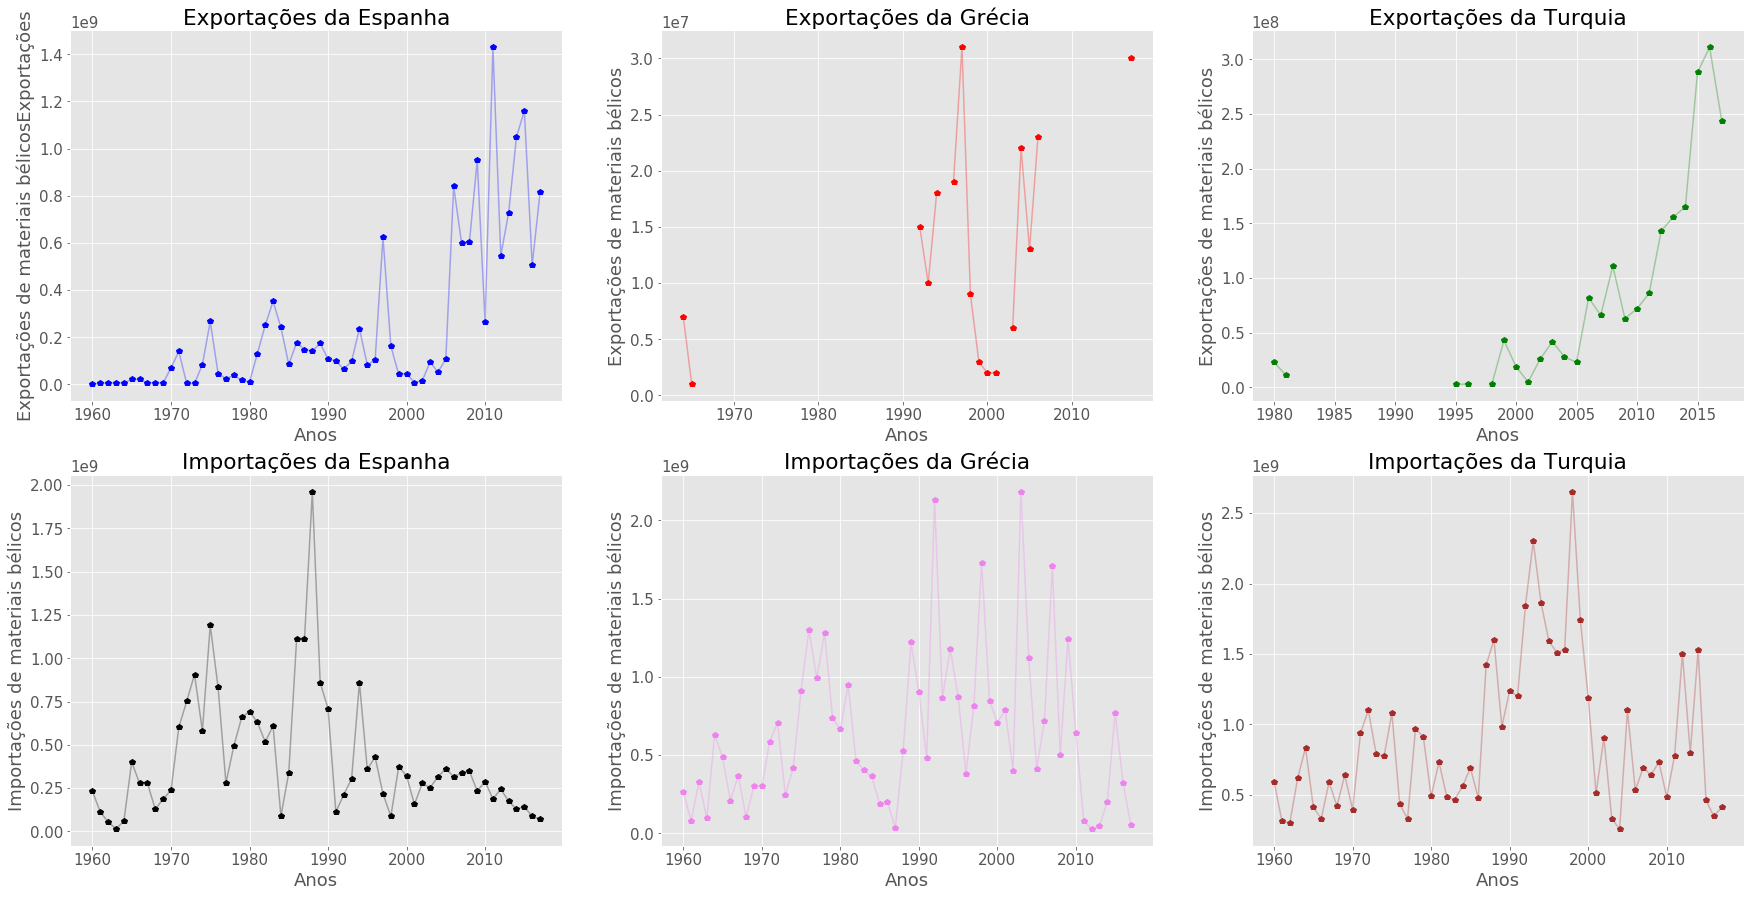

In [152]:
#separando o dados de cada país
#importações
lately_spain_export=lately.iloc[1,0:58]

lately_greece_export=lately.iloc[0,0:58]

lately_turkey_export=lately.iloc[2,0:58]

#exportações
lately_spain_import=lately.iloc[1,59:117]

lately_greece_import=lately.iloc[0,59:117]

lately_turkey_import=lately.iloc[2,59:117]


#plotando os gráficos
plt.rc("font",size=15)
fig=plt.figure(figsize=(30,15))
#plotando gráficos das Exportações
plt.subplot(231)
plot=plt.plot(t,lately_spain_export,'pb')
plot=plt.plot(t,lately_spain_export,'b',alpha=0.3)
plt.title('Exportações da Espanha')
plt.xlabel("Anos")
plt.ylabel("Exportações de materiais bélicosExportações")
plt.grid(True)

plt.subplot(232)
plot=plt.plot(t,lately_greece_export,'pr')
plot=plt.plot(t,lately_greece_export,'r', alpha=0.3)
plt.title("Exportações da Grécia")
plt.xlabel("Anos")
plt.ylabel("Exportações de materiais bélicos")
plt.grid(True)

plt.subplot(233)
plot=plot=plt.plot(t,lately_turkey_export,'pg')
plot=plt.plot(t,lately_turkey_export,'g', alpha=0.3)
plt.title("Exportações da Turquia")
plt.xlabel("Anos")
plt.ylabel("Exportações de materiais bélicos")
plt.grid(True)

#plotando gráficos das Importações
plt.subplot(234)
plot=plt.plot(t,lately_spain_import,'p',color="black")
plot=plt.plot(t,lately_spain_import,color="black",alpha=0.3)
plt.title('Importações da Espanha')
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")
plt.grid(True)

plt.subplot(235)
plot=plt.plot(t,lately_greece_import,'p',color="violet")
plot=plt.plot(t,lately_greece_import,color="violet", alpha=0.3)
plt.title("Importações da Grécia")
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")
plt.grid(True)


plt.subplot(236)
plot=plt.plot(t,lately_turkey_import,'p',color="brown")
plot=plt.plot(t,lately_turkey_import,color="brown", alpha=0.3)
plt.title("Importações da Turquia")
plt.xlabel("Anos")
plt.ylabel("Importações de materiais bélicos")


Nesses gráficos podemos analisar como variaram as taxas de Importação e de Exportação de materiais bélicos dos países que entraram tardiamente na OTAN ao longo dos anos

Agora plotarei um gráfico referente as Importações e Exportações dos países que entraram posteriormente na OTAN

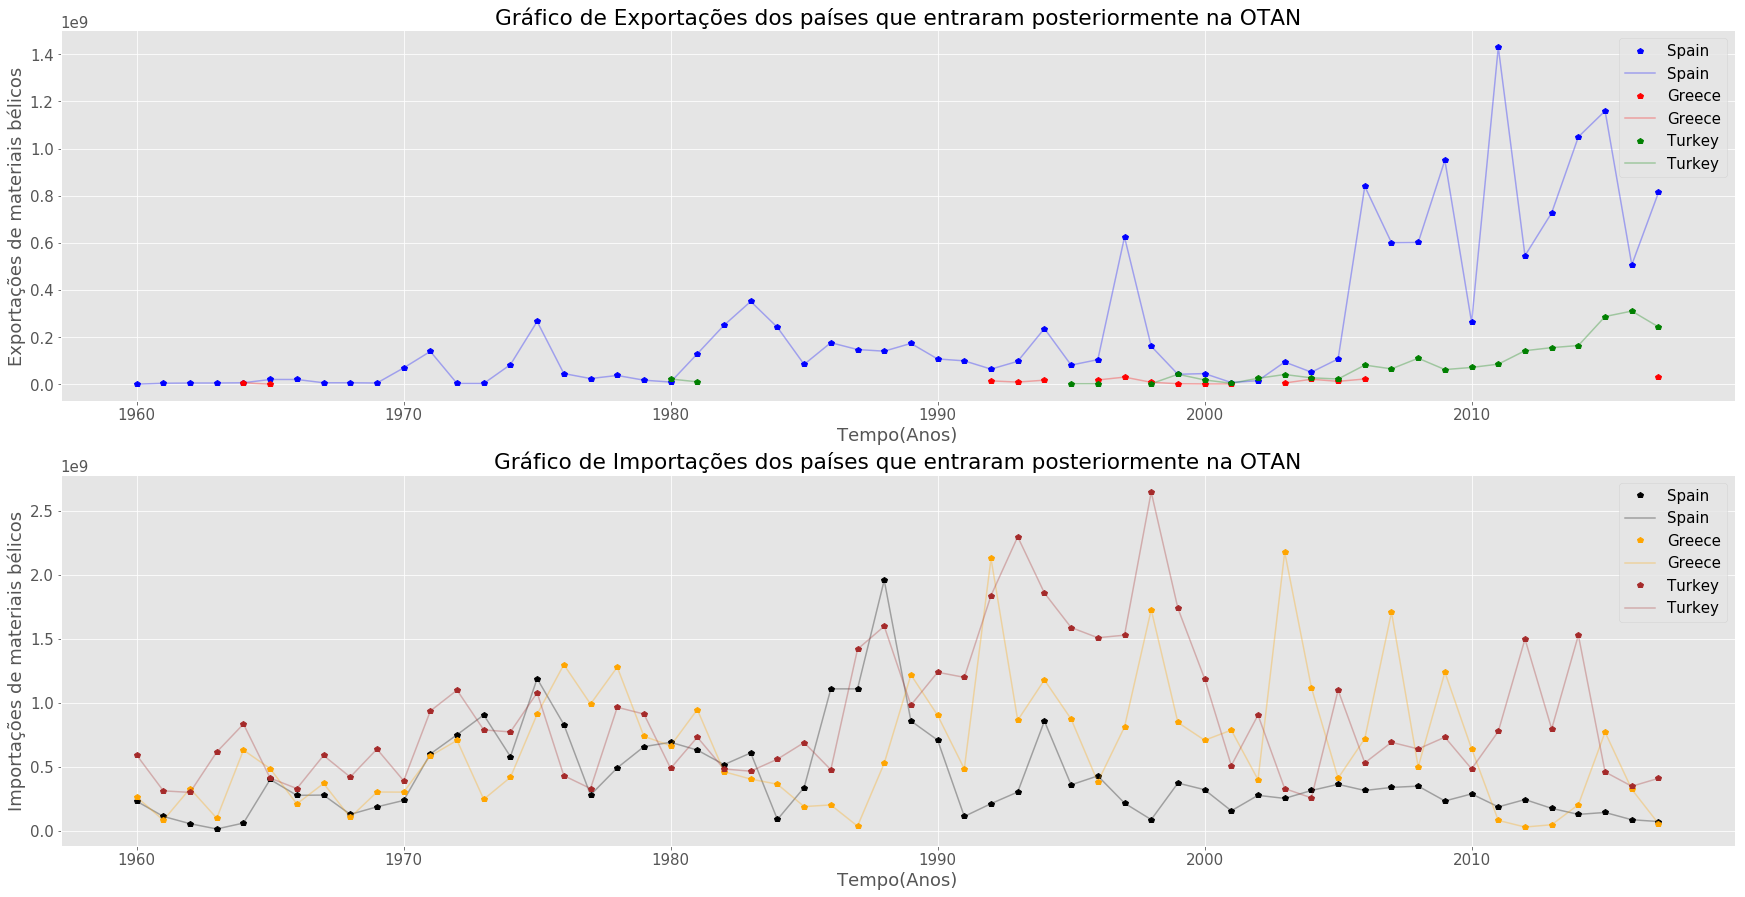

In [153]:
plt.rc("font",size=15)
fig=plt.figure(figsize=(30,15))

plt.subplot(211)
plot=plt.plot(t,lately_spain_export,'pb')
plot=plt.plot(t,lately_spain_export,'b',alpha=0.3)

plot=plt.plot(t,lately_greece_export,'pr')
plot=plt.plot(t,lately_greece_export,'r', alpha=0.3)

plot=plt.plot(t,lately_turkey_export,'pg')
plot=plt.plot(t,lately_turkey_export,'g', alpha=0.3)
plt.title("Gráfico de Exportações dos países que entraram posteriormente na OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Exportações de materiais bélicos")
plt.legend()
plt.grid(True)

plt.subplot(212)
plot=plt.plot(t,lately_spain_import,'p',color="black")
plot=plt.plot(t,lately_spain_import,color="black",alpha=0.3)

plot=plt.plot(t,lately_greece_import,'p',color="orange")
plot=plt.plot(t,lately_greece_import,color="orange", alpha=0.3)

plot=plt.plot(t,lately_turkey_import,'p',color="brown")
plot=plt.plot(t,lately_turkey_import,color="brown", alpha=0.3)
plt.title("Gráfico de Importações dos países que entraram posteriormente na OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)


Nesse gráfico podemos analisar as taxas de Importação de materiais bélicos dos países que entraram tardiamente na OTAN ao longo dos anos

Agora para podermos comparar melhor esses gráficos, vamos uni-los de maneira organizada, para assim encontrarmos possíveis relações que possam comprovar a hipótese: "Países membros da OTAN ou que adentraram o bloco posteriormente possuem maior exportação e importação de produtos bélicos".
O primeiro passo para isso e comparar os gráficos dos paises dentro e fora da OTAN em relação a suas respectivas taxa de importação e exportação de materiais bélicos.
NOTA: buscou-se pegar países com igual desenvolvimento tanto dentro como fora do bloco, para que seu nível de desenvolvimento não alterasse de maneira significativa os dados.

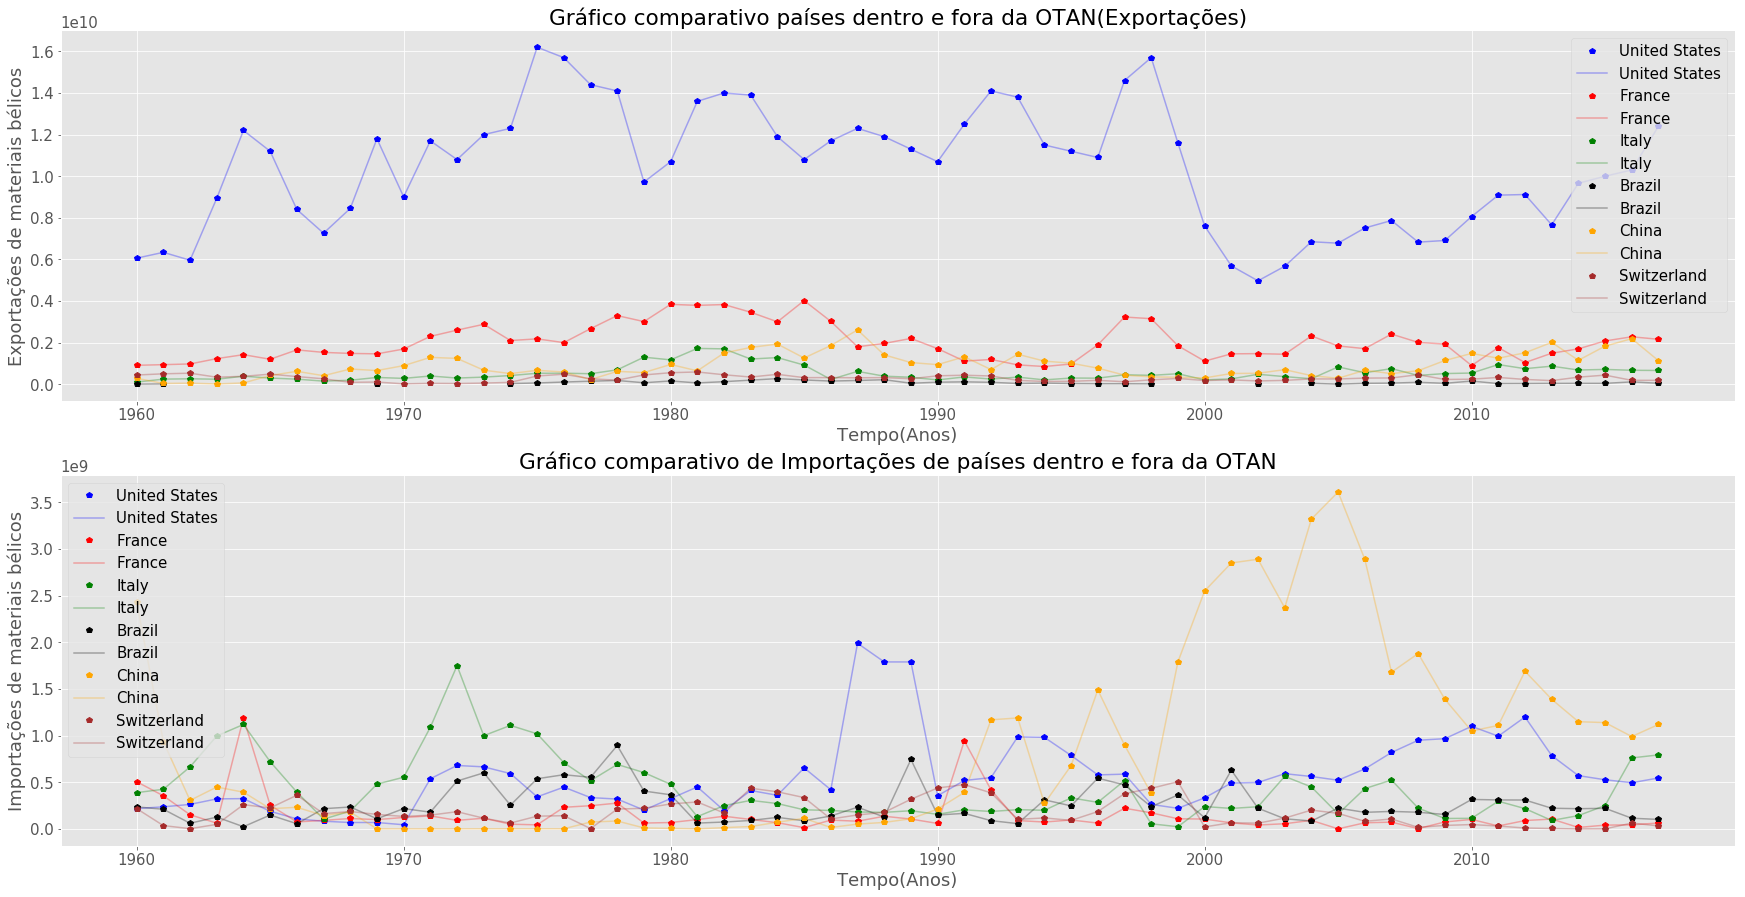

In [154]:
#plotando os gráficos de Importação dos Paises de dentro e de fora da OTAN
plt.rc("font",size=15)
fig=plt.figure(figsize=(30, 15))

#graficos de exportação
plt.subplot(211)
plot=plt.plot(t,inside_eua_export,'pb')
plot=plt.plot(t,inside_eua_export,'b',alpha=0.3)

plot=plt.plot(t,inside_france_export,'pr')
plot=plt.plot(t,inside_france_export,'r', alpha=0.3)

plot=plt.plot(t,inside_italy_export,'pg')
plot=plt.plot(t,inside_italy_export,'g', alpha=0.3)

plot=plt.plot(t,outside_brazil_export,'p',color="black")
plot=plt.plot(t,outside_brazil_export,color="black",alpha=0.3)

plot=plt.plot(t,outside_china_export,'p',color="orange")
plot=plt.plot(t,outside_china_export,color="orange", alpha=0.3)

plot=plt.plot(t,outside_switzerland_export,'p',color="brown")
plot=plt.plot(t,outside_switzerland_export,color="brown", alpha=0.3)
plt.legend()
plt.grid(True)
plt.title("Gráfico comparativo países dentro e fora da OTAN(Exportações)")
plt.ylabel("Exportações de materiais bélicos")
plt.xlabel('Tempo(Anos)')

#gráfico de Importação
plt.subplot(212)
plot=plt.plot(t,inside_eua_import,'pb')
plot=plt.plot(t,inside_eua_import,'b',alpha=0.3)

plot=plt.plot(t,inside_france_import,'pr')
plot=plt.plot(t,inside_france_import,'r', alpha=0.3)

plot=plt.plot(t,inside_italy_import,'pg')
plot=plt.plot(t,inside_italy_import,'g', alpha=0.3)

plot=plt.plot(t,outside_brazil_import,'p',color="black")
plot=plt.plot(t,outside_brazil_import,color="black",alpha=0.3)

plot=plt.plot(t,outside_china_import,'p',color="orange")
plot=plt.plot(t,outside_china_import,color="orange", alpha=0.3)

plot=plt.plot(t,outside_switzerland_import,'p',color="brown")
plot=plt.plot(t,outside_switzerland_import,color="brown", alpha=0.3)

plt.title("Gráfico comparativo de Importações de países dentro e fora da OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Importações de materiais bélicos")
plt.legend()
plt.grid(True)
plt.show()

Nesse gráfico podemos notar uma maior taxa de exportação de materiais bélicos por parte dos países de dentro da OTAN, o que é um indicio de que nossa teoria pode estar correta. Porém ainda não está comprovado, então proceguiremos para os gráficos de Importação comparativa entre os países de dentro e de fora

Nesse gráfico também podemos notar que apesar de sutil, há uma visivel superioridade da taxa de importação dos países pertencentes a OTAN, o que aumenta a possibilidade de nossa hipotese ser verdadeira.

Para concluirmos essa  análise, vamos plotar o gráfico dos países que entraram posteriormente, para checar se houve um aumento nas taxas de importação e exportação de materiais bélicos a partir dos anos em que começaram a fazer parte da OTAN

Text(0, 0.5, 'Importações de materiais bélicos')

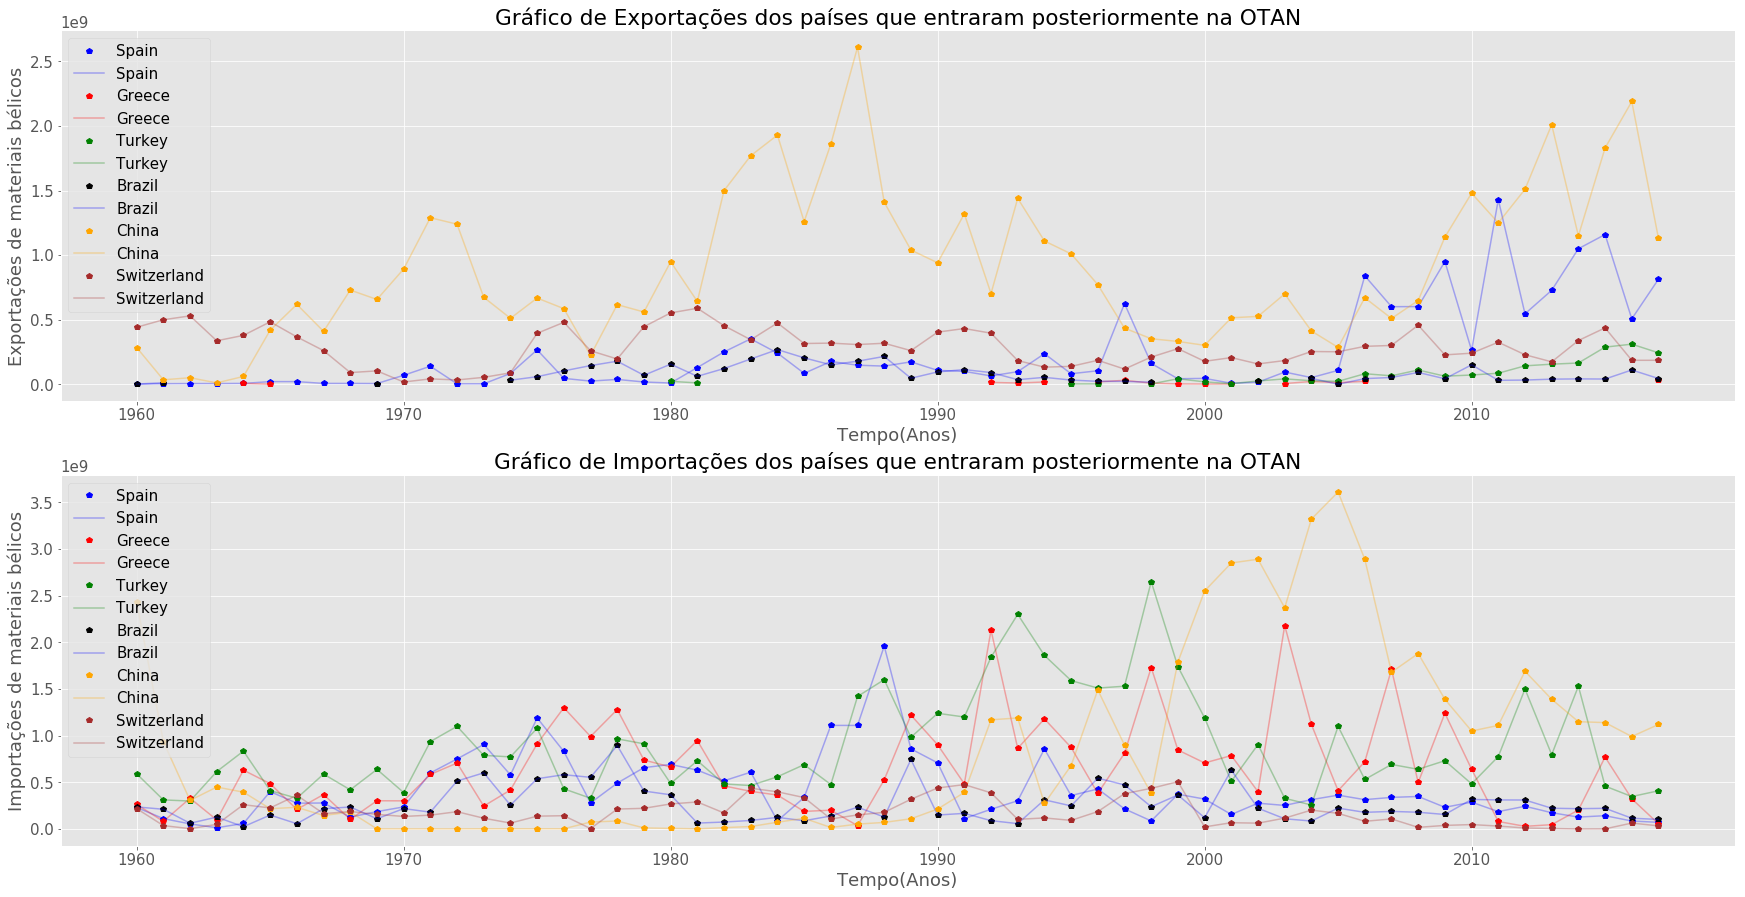

In [155]:
#plotando o gráfico dos países que entraram posteriormente na OTAN com relação aos países fora da OTAN
#exportações
plt.rc("font",size=15)
fig=plt.figure(figsize=(30,15))

plt.subplot(211)
plot=plt.plot(t,lately_spain_export,'pb')
plot=plt.plot(t,lately_spain_export,'b',alpha=0.3)

plot=plt.plot(t,lately_greece_export,'pr')
plot=plt.plot(t,lately_greece_export,'r', alpha=0.3)

plot=plt.plot(t,lately_turkey_export,'pg')
plot=plt.plot(t,lately_turkey_export,'g', alpha=0.3)

plot=plt.plot(t,outside_brazil_export,'p',color="black")
plot=plt.plot(t,outside_brazil_export,'b',alpha=0.3)

plot=plt.plot(t,outside_china_export,'p',color="orange")
plot=plt.plot(t,outside_china_export,color="orange", alpha=0.3)

plot=plt.plot(t,outside_switzerland_export,'p',color="brown")
plot=plt.plot(t,outside_switzerland_export,color="brown", alpha=0.3)

plt.grid(True)
plt.legend()
plt.title("Gráfico de Exportações dos países que entraram posteriormente na OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Exportações de materiais bélicos")

#importações
plt.subplot(212)
plot=plt.plot(t,lately_spain_import,'pb')
plot=plt.plot(t,lately_spain_import,'b',alpha=0.3)

plot=plt.plot(t,lately_greece_import,'pr')
plot=plt.plot(t,lately_greece_import,'r', alpha=0.3)

plot=plt.plot(t,lately_turkey_import,'pg')
plot=plt.plot(t,lately_turkey_import,'g', alpha=0.3)

plot=plt.plot(t,outside_brazil_import,'p',color="black")
plot=plt.plot(t,outside_brazil_import,'b',alpha=0.3)

plot=plt.plot(t,outside_china_import,'p',color="orange")
plot=plt.plot(t,outside_china_import,color="orange", alpha=0.3)

plot=plt.plot(t,outside_switzerland_import,'p',color="brown")
plot=plt.plot(t,outside_switzerland_import,color="brown", alpha=0.3)

plt.grid(True)
plt.legend()
plt.title("Gráfico de Importações dos países que entraram posteriormente na OTAN")
plt.xlabel("Tempo(Anos)")
plt.ylabel("Importações de materiais bélicos")


Como podemos notar no gráfico, retirando-se o caso da china onde ocorreu um aumento grande nas taxas de importações e exportações devido ao seu crescimento e a um novo modelo político adotado, a partir dos anos de entrada da Espanha na OTAN, o que ocorreu em 1982, podemos notar um aumento significativo em suas taxas de importação e exportação. Além da Espanha há ainda a Grécia e a Turquía, podemos notar que na Grécia a partir do seu ano de integração na OTAN em 1952, juntamente com a Turquía, houve um sutíl porém notável aumento em suas exportações e importações; Já a Turquia, apesar de não notar-se alteração em relação a sua Exportação, nota-se um Aumento significativo em suas Importações.

============CONCLUSÃO=================
A partir dos gráficos gerados e da comparção entre países de dentro e de fora da OTAN, juntamente com paises de entrada posterior no bloco, podemos notar que no caso dos países escolhidos houve um aumento significativo em suas taxas de importação e exportação, assim apontando que a hipotese questionada pode possuír um fundo verdadeiro, porém não gostaria de afirma-la como certeza ainda, para isso seriam necessarios mais dados e mais comparações, o que é inviavel devido ao pequeno número de alterações do membros desse bloco em questão. Também há o problema em relação aos dados disponíveis no gapminder, como podemos notar os dados referentes as taxas de importação e exportação da Turqía e da Grécia possuem grande lacunas.
Por esses e outros motivos considero essa análise o suficiente para que consideremos essa hipotese plausível.